In [1]:
import pandas as pd

df = pd.read_csv('data/conso_meteo.csv')

# Conversion de la colonne date et ajout d'un datetime complet avec heure si nécessaire
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['heure'], unit='h')

In [ ]:
df.info()

# Visualisation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15, 7))
plt.plot(df['datetime'], df['LOAD'], label='LOAD', alpha=0.7)
plt.plot(df['datetime'], df['LOAD'].rolling(window=168).mean(), label='Moyenne mobile (168h)', color='red')  # sur une semaine, par exemple
plt.xlabel('Temps')
plt.ylabel('LOAD')
plt.title('Évolution de LOAD dans le temps')
plt.legend()
plt.show()


In [ ]:
# Conversion de la colonne 'date' en datetime et ajout de la colonne 'heure'
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['heure'], unit='h')

# Définir 'datetime' comme index
df.set_index('datetime', inplace=True)

# On s'assure que l'index est trié par date
df = df.sort_index()

# Choisir une date de départ (par exemple, la première date disponible)
start_date = df.index.min()

# Définir les fenêtres temporelles avec DateOffset
one_month = start_date + pd.DateOffset(months=1)
three_months = start_date + pd.DateOffset(months=3)
six_months = start_date + pd.DateOffset(months=6)
one_year = start_date + pd.DateOffset(years=1)

# Filtrer les données pour chaque période
df_1m = df.loc[start_date:one_month]
df_3m = df.loc[start_date:three_months]
df_6m = df.loc[start_date:six_months]
df_1y = df.loc[start_date:one_year]

# Créer une figure avec 4 subplots (2 lignes x 2 colonnes)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()  # pour simplifier l'indexation

# Subplot 1 : 1 mois
axs[0].plot(df_1m.index, df_1m['LOAD'], color='blue')
axs[0].set_title("LOAD sur 1 mois")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("LOAD")

# Subplot 2 : 3 mois
axs[1].plot(df_3m.index, df_3m['LOAD'], color='green')
axs[1].set_title("LOAD sur 3 mois")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("LOAD")

# Subplot 3 : 6 mois
axs[2].plot(df_6m.index, df_6m['LOAD'], color='red')
axs[2].set_title("LOAD sur 6 mois")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("LOAD")

# Subplot 4 : 1 an
axs[3].plot(df_1y.index, df_1y['LOAD'], color='purple')
axs[3].set_title("LOAD sur 1 an")
axs[3].set_xlabel("Date")
axs[3].set_ylabel("LOAD")

fig.tight_layout()  # Ajuste l'espacement entre les subplots
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.boxplot(x='heure', y='LOAD', data=df)
plt.xlabel('Heure de la journée')
plt.ylabel('LOAD')
plt.title('Distribution de LOAD selon l’heure')
plt.show()


In [ ]:
import numpy as np

# Sélectionner les colonnes d'intérêt
cols_interet = ['LOAD'] + [f'w{i}' for i in range(1, 26)]
corr_matrix = df[cols_interet].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation entre LOAD et les variables explicatives')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
# Utilisation d'un colormap cyclique, ici "twilight"
sc = plt.scatter(df['w1'], df['LOAD'], c=df['heure'], cmap='twilight', alpha=0.5)
plt.xlabel('w1')
plt.ylabel('LOAD')
plt.title('Relation entre w1 et LOAD')
plt.colorbar(sc, label='Heure')
plt.show()


In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par "w"
wi_columns = [col for col in df.columns if col.startswith('w')]

plt.figure(figsize=(12, 6))
df[wi_columns].boxplot()
plt.title("Box Plot des colonnes wi")
plt.xticks(rotation=45)  # Pour une meilleure lisibilité des noms de colonnes
plt.ylabel("Valeurs")
plt.show()


In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par "w"
wi_columns = [col for col in df.columns if col.startswith('w')]

# Créer un plot pour afficher l'évolution de toutes les colonnes wi dans le temps
plt.figure(figsize=(15, 7))
for col in wi_columns:
    plt.plot(df.index, df[col], label=col, alpha=0.5)

plt.title("Évolution des colonnes wi au cours du temps")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par 'w'
wi_columns = [col for col in df.columns if col.startswith('w')]

# Résumer les données par semaine (moyenne)
df_resampled = df[wi_columns].resample('W').mean()

plt.figure(figsize=(15, 7))
for col in wi_columns:
    plt.plot(df_resampled.index, df_resampled[col], label=col, alpha=0.7)

plt.title("Évolution des colonnes wi au cours du temps (rééchantillonnage hebdomadaire)")
plt.xlabel("Temps")
plt.ylabel("Valeurs moyennes")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Ajouter une colonne "year" à partir de l'index datetime
df['year'] = df.index.year

# Obtenir la liste des années disponibles et la trier
years = sorted(df['year'].unique())
initial_year = years[0]  # Année affichée par défaut

# Filtrer pour l'année initiale
df_initial = df[df['year'] == initial_year]

# Créer la figure et tracer la courbe pour l'année initiale
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_initial.index,
    y=df_initial['LOAD'],
    mode='lines',
    name=str(initial_year)
))

# Créer les boutons pour le menu déroulant (sélection de l'année)
year_buttons = []
for year in years:
    df_year = df[df['year'] == year]
    year_buttons.append(dict(
        label=str(year),
        method="update",
        args=[{"x": [df_year.index], "y": [df_year['LOAD']]},
              {"title": f"Load pour l'année {year}"}]
    ))

# Créer les boutons radio pour régler l'échelle de temps
# Nous modifions ici la propriété xaxis.dtick qui définit l'intervalle entre les ticks (en millisecondes)
time_scale_buttons = [
    dict(
        label="Quotidien",
        method="relayout",
        args=[{"xaxis.dtick": 86400000}]  # 1 jour = 86 400 000 ms
    ),
    dict(
        label="Hebdomadaire",
        method="relayout",
        args=[{"xaxis.dtick": 604800000}]  # 7 jours = 604 800 000 ms
    ),
    dict(
        label="Mensuel",
        method="relayout",
        args=[{"xaxis.dtick": 2592000000}]  # environ 30 jours = 2 592 000 000 ms
    ),
    dict(
        label="Annuel",
        method="relayout",
        args=[{"xaxis.dtick": 31536000000}]  # 365 jours = 31 536 000 000 ms
    )
]

# Mise à jour de la mise en page du graphique avec deux menus :
fig.update_layout(
    title=f"Load pour l'année {initial_year}",
    xaxis_title="Date",
    yaxis_title="LOAD",
    template="plotly_white",
    width=1200,    # Largeur du graphique
    height=800,    # Hauteur du graphique
    updatemenus=[
        # Menu déroulant pour sélectionner l'année
        dict(
            active=0,
            buttons=year_buttons,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
        # Boutons radio pour régler l'échelle temporelle
        dict(
            type="buttons",
            direction="right",
            showactive=True,
            buttons=time_scale_buttons,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top"
        )
    ]
)

fig.show()


# Modélisation

## Nombre de clusters optimal pour les Wi

In [2]:
wi_columns = [col for col in df.columns if col.startswith('w')]
# Transposer la matrice afin que chaque ligne corresponde à un wi et chaque colonne à un instant
df_w = df[wi_columns].transpose()
df_w.index.name = 'wi'
print(df_w.shape) 

(25, 60600)


In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardisation ligne par ligne (chaque wi est considérée comme un échantillon)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_w)

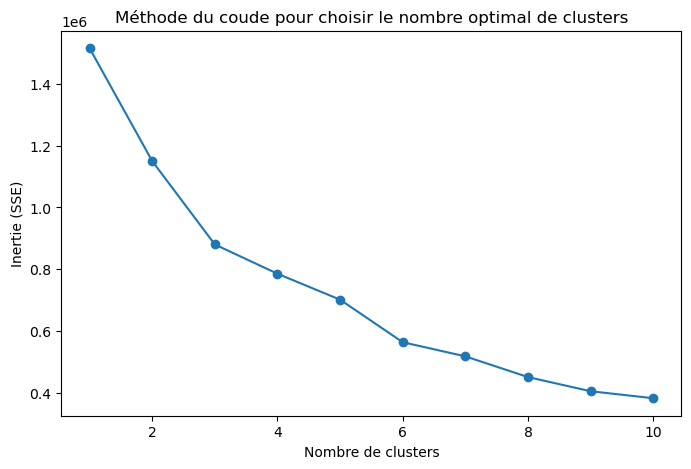

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supposons que X est votre matrice de forme (nombre_de_wi, nombre_d'instants)
# Exemple : X = data_scaled obtenu après transposition et standardisation

sse = []  # somme des distances intra-clusters (inertie)
k_range = range(1, 11)  # tester de 1 à 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)  # inertia_ est la somme des distances au carré dans chaque cluster

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie (SSE)")
plt.title("Méthode du coude pour choisir le nombre optimal de clusters")
plt.show()


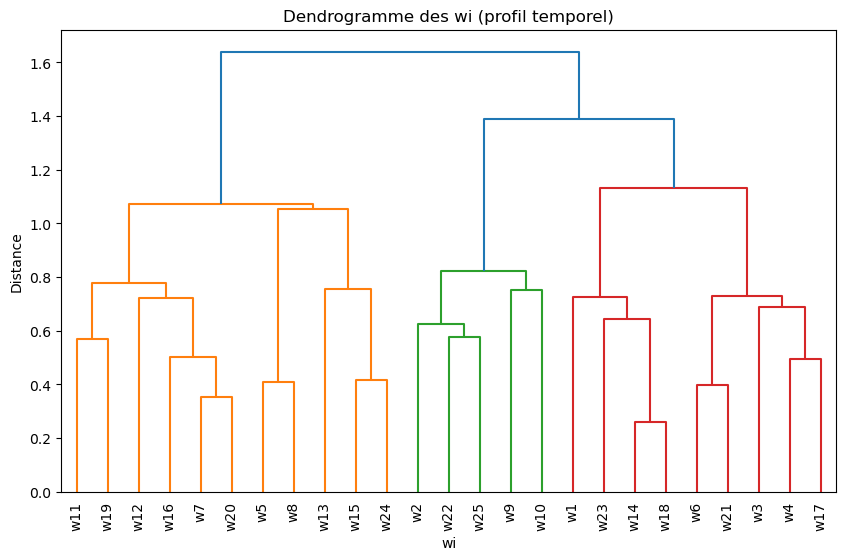

In [5]:
# Calcul de la matrice de corrélation entre les wi (lignes de data_scaled)
corr_matrix = np.corrcoef(data_scaled)
# Transformation en matrice de distance
distance_matrix = 1 - np.abs(corr_matrix)

# Forcer la symétrie en moyennant la matrice avec sa transposée
distance_matrix = (distance_matrix + distance_matrix.T) / 2

# S'assurer que la diagonale est nulle (ce qui est requis pour une matrice de distance)
import numpy as np
np.fill_diagonal(distance_matrix, 0)

# Puis convertir en format condensé
from scipy.spatial.distance import squareform
condensed_distance = squareform(distance_matrix)


from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# Transformation de la matrice de distance en format condensé requis par linkage
condensed_distance = squareform(distance_matrix)

# Application du clustering hiérarchique (méthode de Ward par exemple)
Z = linkage(condensed_distance, method='ward')

# Visualisation du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=wi_columns, leaf_rotation=90)
plt.title("Dendrogramme des wi (profil temporel)")
plt.xlabel("wi")
plt.ylabel("Distance")
plt.show()


In [ ]:
# Choix d'un seuil pour le découpage du dendrogramme
seuil = 1.1  # ajustez cette valeur en fonction du dendrogramme observé
clusters = fcluster(Z, t=seuil, criterion='distance')

# Affichage de l'affectation des clusters
cluster_assignments = pd.DataFrame({'wi': wi_columns, 'cluster': clusters})

# Liste pour stocker le représentant de chaque cluster
selected_features = []

# Parcourir chaque cluster unique
for cl in cluster_assignments['cluster'].unique():
    # Filtrer les wi appartenant au cluster cl
    subset = cluster_assignments[cluster_assignments['cluster'] == cl]
    
    best_variable = None
    best_corr = -np.inf  # initialisation pour trouver la corrélation absolue maximale
    
    # Parcourir les variables du cluster
    for var in subset['wi']:
        # Calculer la corrélation absolue de la variable var avec LOAD
        corr = np.abs(df[var].corr(df['LOAD']))
        if corr > best_corr:
            best_corr = corr
            best_variable = var
    
    # Ajout du représentant pour ce cluster
    selected_features.append(best_variable)

print("Variables représentatives sélectionnées pour la modélisation :", selected_features)


Variables représentatives sélectionnées pour la modélisation : ['w1', 'w25', 'w17', 'w19']


In [ ]:
selected_features = []

# Itérer sur chaque cluster unique
for cl in cluster_assignments['cluster'].unique():
    # Extraire la liste des wi appartenant au cluster cl
    features_in_cluster = cluster_assignments[cluster_assignments['cluster'] == cl]['wi'].tolist()
    
    # Extraire le sous-ensemble des séries temporelles correspondantes
    subset = df_w.loc[features_in_cluster]  # chaque ligne est la série temporelle d'un wi
    
    # Calculer le centroïde du cluster (moyenne de chaque colonne)
    centroide = subset.mean(axis=0)
    
    # Calculer la distance Euclidienne de chaque wi par rapport au centroïde
    # On peut utiliser une lambda pour appliquer la norme sur chaque ligne (axis=1)
    distances = subset.apply(lambda row: np.linalg.norm(row - centroide), axis=1)
    
    # Identifier le wi avec la distance minimale
    feature_centre = distances.idxmin()
    selected_features.append(feature_centre)

print("Variables représentatives (proches du centroïde) :", selected_features)


Variables représentatives (proches du centroïde) : ['w18', 'w25', 'w4', 'w24']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.metrics import cdist_dtw
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

# Supposons que df_w est votre DataFrame où chaque ligne correspond à un wi 
# et chaque colonne à une observation temporelle
# Par exemple : df_w = df[wi_columns].transpose()

# Conversion en matrice numpy
X = df_w.values  # Shape: (nombre_de_wi, nombre_d_instants)

# Calcul de la matrice de distances DTW entre chaque série temporelle
# Attention : ce calcul peut être coûteux si vous avez beaucoup de séries
distance_matrix = cdist_dtw(X)

# Transformation en format condensé (format requis par linkage)
condensed_distance = squareform(distance_matrix)

# Application du clustering hiérarchique (par exemple, méthode "average")
Z = linkage(condensed_distance, method='average')

# Visualisation du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df_w.index)
plt.title("Dendrogramme avec distance DTW")
plt.xlabel("wi")
plt.ylabel("Distance DTW")
plt.show()

# Choix du seuil pour découper le dendrogramme (par exemple, 1.1 ou à ajuster selon l'observation)
seuil = 1.1
clusters = fcluster(Z, t=seuil, criterion='distance')

# Affichage de l'affectation des clusters
cluster_assignments = pd.DataFrame({'wi': df_w.index, 'cluster': clusters})
print(cluster_assignments)


/opt/conda/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
